In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import requests

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score

In [3]:
data = 'https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-02-car-price/data.csv'

In [4]:
response = requests.get(data)

In [5]:
with open ('data.csv','wb')as csv_file:
    csv_file.write(response.content)
    

In [6]:
raw_df = pd.read_csv('data.csv')

In [7]:
raw_df.shape

(11914, 16)

In [8]:
selected = ['Make',
'Model',
'Year',
'Engine HP',
'Engine Cylinders',
'Transmission Type',
'Vehicle Style',
'highway MPG',
'city mpg',
'MSRP']

In [9]:
df = raw_df[selected]

In [10]:
df.columns = df.columns.str.lower().str.replace(' ','_')

In [11]:
categorical_col = df.dtypes[df.dtypes == 'object'].index
categorical_col

Index(['make', 'model', 'transmission_type', 'vehicle_style'], dtype='object')

In [12]:
for c in categorical_col:
    df[c]= df[c].str.lower().str.replace(' ','_')
    print(c)

make
model
transmission_type
vehicle_style


C:\Users\mulin\AppData\Local\Temp\ipykernel_20792\3070521288.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[c]= df[c].str.lower().str.replace(' ','_')


In [13]:
df.isnull().sum()

make                  0
model                 0
year                  0
engine_hp            69
engine_cylinders     30
transmission_type     0
vehicle_style         0
highway_mpg           0
city_mpg              0
msrp                  0
dtype: int64

In [14]:
df.loc[df['engine_hp'].isna(), 'engine_hp'] = 0      
df.loc[df['engine_cylinders'].isna(), 'engine_cylinders'] = 0

In [15]:
df.loc[10,'msrp']>df.msrp.mean()

False

In [16]:
df['above_average']= (df.msrp>df.msrp.mean()).astype('int')

C:\Users\mulin\AppData\Local\Temp\ipykernel_20792\1887135970.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['above_average']= (df.msrp>df.msrp.mean()).astype('int')


In [17]:
df

,make,model,year,engine_hp,engine_cylinders,transmission_type,vehicle_style,highway_mpg,city_mpg,msrp,above_average
0,bmw,1_series_m,2011,335.0,6.0,manual,coupe,26,19,46135,1
1,bmw,1_series,2011,300.0,6.0,manual,convertible,28,19,40650,1
2,bmw,1_series,2011,300.0,6.0,manual,coupe,28,20,36350,0
3,bmw,1_series,2011,230.0,6.0,manual,coupe,28,18,29450,0
4,bmw,1_series,2011,230.0,6.0,manual,convertible,28,18,34500,0
...,...,...,...,...,...,...,...,...,...,...,...
11909,acura,zdx,2012,300.0,6.0,automatic,4dr_hatchback,23,16,46120,1
11910,acura,zdx,2012,300.0,6.0,automatic,4dr_hatchback,23,16,56670,1
11911,acura,zdx,2012,300.0,6.0,automatic,4dr_hatchback,23,16,50620,1
11912,acura,zdx,2013,300.0,6.0,automatic,4dr_hatchback,23,16,50920,1


In [18]:
df_full_train,df_test = train_test_split(df,random_state=1,test_size=0.2)
df_train,df_val = train_test_split(df_full_train,random_state=1,test_size=0.25)

In [19]:
len(df_train),len(df_val),len(df_test)

(7148, 2383, 2383)

In [20]:
df.dtypes != 'object'

make                 False
model                False
year                  True
engine_hp             True
engine_cylinders      True
transmission_type    False
vehicle_style        False
highway_mpg           True
city_mpg              True
msrp                  True
above_average         True
dtype: bool

In [21]:
numerical = ['year',                
'engine_hp',       
'engine_cylinders', 
'highway_mpg',
'city_mpg' ]  

In [22]:
categorical = ['make', 'model', 'transmission_type', 'vehicle_style']

In [23]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

y_train = df_train.above_average.values
y_val = df_val.above_average.values
y_test = df_test.above_average.values


del df_train['above_average']
del df_val['above_average']
del df_test['above_average']

del df_train['msrp']
del df_val['msrp']
del df_test['msrp']


In [24]:
for c in numerical:
    auc = roc_auc_score(y_train,df_train[c])
    if auc<0.5:
        auc = roc_auc_score(y_train,-df_train[c])
    print(f'{c}     {auc}')
        

year     0.687551492804683
engine_hp     0.9171031265539011
engine_cylinders     0.766116490165669
highway_mpg     0.6330587871772013
city_mpg     0.6734244643245233


In [25]:
dv = DictVectorizer(sparse = False)

In [26]:
train_dict = df_train[categorical+numerical].to_dict(orient='records')
x_train = dv.fit_transform(train_dict)

val_dicts = df_val[categorical+numerical].to_dict(orient='records')
x_val = dv.transform(val_dicts)


In [27]:
model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)
model.fit(x_train,y_train)

LogisticRegression(max_iter=1000, solver='liblinear')

In [28]:
y_pred = model.predict_proba(x_val)[:,1]

In [29]:
y_pred

array([0.61087841, 0.02042592, 0.49086482, ..., 0.0066375 , 0.99998348,
       0.08432037])

In [30]:
round(roc_auc_score(y_val,y_pred),3)

0.976

In [31]:
thresholds = np.linspace(0, 1, 101)

In [32]:
def precision_recall(y_val,y_pred):
    scores = []
    for t in thresholds:
        a_p = (y_val == 1)
        a_n = (y_val == 0)
        
        p_p = (y_pred >= t)
        p_n = (y_pred <t)
        
        tp = (a_p & p_p).sum()
        tn = (a_n & p_n).sum()
        fp = (a_n & p_p).sum()
        fn = (a_p & p_n).sum()
        
        
        scores.append((t,tp,fp,fn,tn))
        
    columns = ['threshold', 'tp', 'fp', 'fn', 'tn']
    df_scores = pd.DataFrame(scores,columns=columns)
    
    return df_scores


df_scores = precision_recall(y_val,y_pred)
df_scores

,threshold,tp,fp,fn,tn
0,0.00,654,1729,0,0
1,0.01,652,854,2,875
2,0.02,651,702,3,1027
3,0.03,651,618,3,1111
4,0.04,650,559,4,1170
...,...,...,...,...,...
96,0.96,254,1,400,1728
97,0.97,241,0,413,1729
98,0.98,217,0,437,1729
99,0.99,184,0,470,1729


In [33]:
df_scores['p'] = df_scores['tp'] /df_scores['tp']+df_scores['fp']
df_scores['r'] = df_scores['tp'] /df_scores['tp']+df_scores['fn']

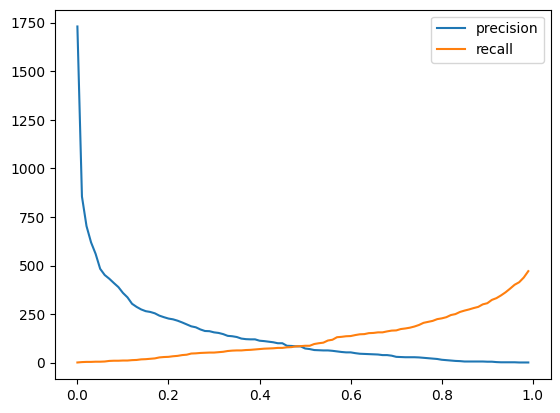

In [34]:
plt.plot(df_scores.threshold, df_scores.p, label='precision')
plt.plot(df_scores.threshold, df_scores.r, label='recall')

plt.legend()
plt.show()

In [35]:
df_scores['f1'] = 2 *(df_scores.p * df_scores.r) / (df_scores.p + df_scores.r)
df_scores

,threshold,tp,fp,fn,tn,p,r,f1
0,0.00,654,1729,0,0,1730.0,1.0,1.998845
1,0.01,652,854,2,875,855.0,3.0,5.979021
2,0.02,651,702,3,1027,703.0,4.0,7.954738
3,0.03,651,618,3,1111,619.0,4.0,7.948636
4,0.04,650,559,4,1170,560.0,5.0,9.911504
...,...,...,...,...,...,...,...,...
96,0.96,254,1,400,1728,2.0,401.0,3.980149
97,0.97,241,0,413,1729,1.0,414.0,1.995181
98,0.98,217,0,437,1729,1.0,438.0,1.995444
99,0.99,184,0,470,1729,1.0,471.0,1.995763


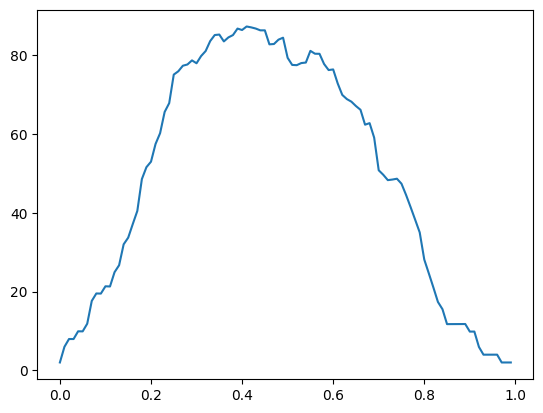

In [36]:
plt.plot(df_scores.threshold,df_scores.f1);

In [37]:
kfold = KFold(n_splits=5, shuffle=True, random_state=1)

In [38]:
def train(df, y, C=1.0):
    dicts = df[categorical+numerical].to_dict(orient='records')

    dv = DictVectorizer(sparse=False)
    x_train = dv.fit_transform(dicts)

    model = LogisticRegression(solver='liblinear', C=C)
    model.fit(x_train, y)

    return dv, model

def predict(df, dv, model):
    dicts = df[categorical+numerical].to_dict(orient='records')

    X = dv.transform(dicts)
    y_pred = model.predict_proba(X)[:, 1]

    return y_pred

In [40]:
for train_idx,val_idx in kfold.split(df_full_train):
        scores = [ ]
        df_train = df_full_train.iloc[train_idx]
        df_val = df_full_train.iloc[val_idx]

        y_train = df_train.above_average
        y_val = df_val.above_average

        dv,model = train(df_train,y_train,C=1.0)
        y_pred = predict(df_val,dv,model)


        auc = roc_auc_score(y_val,y_pred)
        scores.append(auc)

print( np.mean(scores) , np.std(scores))  

0.9775377400377401 0.0


In [42]:
for C in [0.01, 0.1, 0.5, 10]:
    for train_idx,val_idx in kfold.split(df_full_train):
        scores = [ ]
        df_train = df_full_train.iloc[train_idx]
        df_val = df_full_train.iloc[val_idx]

        y_train = df_train.above_average
        y_val = df_val.above_average

        dv,model = train(df_train,y_train,C=C)
        y_pred = predict(df_val,dv,model)


        auc = roc_auc_score(y_val,y_pred)
        scores.append(auc)

    print(C,  np.mean(scores) , np.std(scores))   

0.01 0.9502400377400377 0.0
0.1 0.9733780108780109 0.0
0.5 0.9777111777111777 0.0
10 0.9774947274947275 0.0
